In [1]:
from cold_atom_provider import ColdAtomProvider 

provider = ColdAtomProvider('token')
backend_list = provider.backends() 

print(backend_list)

[<CoherentSpinsDevice('SoPa_atomic_mixtures')>]


In [2]:
backend = provider.get_backend('SoPa_atomic_mixtures')
config_dict = backend.configuration().to_dict()

print(backend.access_token)

import pprint
pprint.pprint(config_dict)

token
{'atomic_species': ['na', 'k'],
 'backend_name': 'SoPa_atomic_mixtures',
 'backend_version': '0.0.1',
 'basis_gates': ['delay', 'rx'],
 'conditional': False,
 'coupling_map': [[0, 1]],
 'credits_required': False,
 'description': 'Setup of an atomic mixtures experiment with one trapping site '
                'and two atomic species, namely Na and K.',
 'display_name': 'SoPa',
 'dynamic_reprate_enabled': False,
 'gates': [{'coupling_map': [[0, 1]],
            'description': 'evolution under SCC Hamiltonian for time tau',
            'name': 'delay',
            'parameters': ['tau', 'delta'],
            'qasm_def': 'gate delay(tau, delta) {}'},
           {'coupling_map': [[0]],
            'description': 'Rotation of the sodium spin',
            'name': 'rx',
            'parameters': ['theta'],
            'qasm_def': 'gate rx(theta) {}'}],
 'local': False,
 'max_experiments': 3,
 'max_shots': 60,
 'memory': True,
 'n_qubits': 2,
 'online_date': 'Since_big_bang',
 'open_pulse

In [3]:
circuit = backend.get_empty_circuit()

print("Quantum registers in the circuit: ", circuit.qregs)
print("Classical registers in the circuit: ", circuit.cregs)
circuit.draw()

Quantum registers in the circuit:  [QuantumRegister(1, 'na'), QuantumRegister(1, 'k')]
Classical registers in the circuit:  [ClassicalRegister(2, 'c2')]


na_0: 
      
 k_0: 
      
c2: 2/

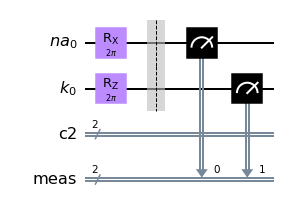

In [10]:
from circuit_library import SpinsRXGate, SpinsRZGate
import numpy as np

circuit_list = []

time_vals = np.linspace(0, 2*np.pi, 20)

for i, time in enumerate(time_vals):
    circuit = backend.get_empty_circuit()
    
    circuit.append(SpinsRXGate(omega=time), qargs=[0])
    circuit.append(SpinsRZGate(delta=time), qargs=[1])
    
    
    circuit.measure_all()
    circuit_list.append(circuit)

circuit.draw(output = 'mpl')

In [11]:
job = backend.run(circuit_list)

AssertionError: SoPa_atomic_mixtures does not support rz.

In [6]:
print(job.job_id())
print(job.status())

20210330_124239_3c620
INITIALIZING


In [8]:
result = job.result(timeout=20)

print(result)

completed cycle
completed cycle
completed cycle


JobTimeoutError: 'Timed out waiting for result'

In [ ]:
result_dict = result.to_dict()
pprint.pprint(result_dict)